# One sample analysis

## 🧬 Overview
### In this analysis, I’ve used one of the Squidpy demo samples, so you can easily grab the same one and give it a try yourself! 🧠✨

In [7]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import squidpy as sq
import spatools as st
import matplotlib as mpl
import matplotlib.pyplot as plt

In [8]:
adata = sq.datasets.visium_hne_adata()

In [9]:
adata

AnnData object with n_obs × n_vars = 2688 × 18078
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'leiden', 'cluster'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'cluster_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

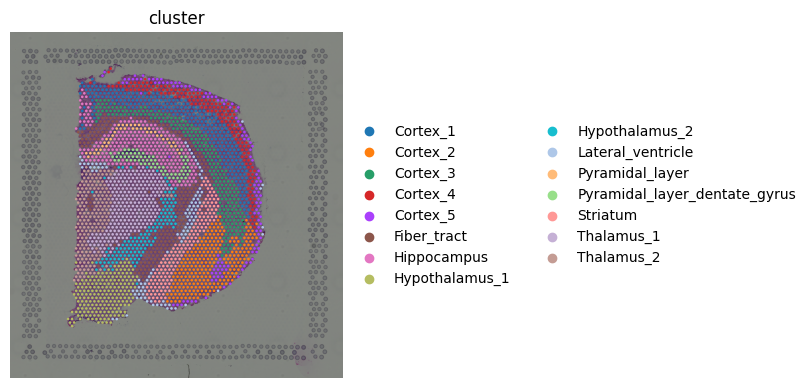

In [10]:
import matplotlib.pyplot as plt

sq.pl.spatial_scatter(adata, color="cluster", frameon=False, figsize=(8,8))# type: ignore

In [11]:
adata.obs["cluster"]

AAACAAGTATCTCCCA-1             Cortex_2
AAACAATCTACTAGCA-1             Cortex_5
AAACACCAATAACTGC-1           Thalamus_2
AAACAGAGCGACTCCT-1             Cortex_5
AAACCGGGTAGGTACC-1           Thalamus_2
                            ...        
TTGTTGTGTGTCAAGA-1    Lateral_ventricle
TTGTTTCACATCCAGG-1       Hypothalamus_1
TTGTTTCATTAGTCTA-1       Hypothalamus_1
TTGTTTCCATACAACT-1           Thalamus_2
TTGTTTGTGTAAATTC-1             Cortex_4
Name: cluster, Length: 2688, dtype: category
Categories (15, object): ['Cortex_1', 'Cortex_2', 'Cortex_3', 'Cortex_4', ..., 'Pyramidal_layer_dentate_gyrus', 'Striatum', 'Thalamus_1', 'Thalamus_2']

In [12]:
adata = st.tl.correlate_distances(adata, is_concatenated=False, cluster_col="cluster")

In [13]:
type(adata.obsm["spatial"])

numpy.ndarray

In [14]:
adata.obsm["spatial"]

array([[8230, 7237],
       [4170, 1611],
       [2519, 8315],
       ...,
       [3276, 8435],
       [3069, 6639],
       [4720, 2090]])

In [15]:
adata.uns["spatools"]

,x,y,point_name,color,x_neigh,y_neigh,color_neigh,distance,combination
0,8230,7237,8230_7237,Cortex_2,8367,7237,Cortex_5,137.000000,"(Cortex_2, Cortex_5)"
1,8230,7237,8230_7237,Cortex_2,8161,7357,Cortex_2,138.423264,"(Cortex_2, Cortex_2)"
2,8230,7237,8230_7237,Cortex_2,8092,7237,Cortex_2,138.000000,"(Cortex_2, Cortex_2)"
3,8230,7237,8230_7237,Cortex_2,8298,7357,Cortex_5,137.927517,"(Cortex_2, Cortex_5)"
4,8230,7237,8230_7237,Cortex_2,8161,7118,Cortex_2,137.557261,"(Cortex_2, Cortex_2)"
...,...,...,...,...,...,...,...,...,...
15575,4720,2090,4720_2090,Cortex_4,4858,2090,Cortex_1,138.000000,"(Cortex_1, Cortex_4)"
15576,4720,2090,4720_2090,Cortex_4,4651,2209,Cortex_1,137.557261,"(Cortex_1, Cortex_4)"
15577,4720,2090,4720_2090,Cortex_4,4789,1970,Cortex_4,138.423264,"(Cortex_4, Cortex_4)"
15578,4720,2090,4720_2090,Cortex_4,4651,1970,Cortex_4,138.423264,"(Cortex_4, Cortex_4)"


In [16]:
adata = st.tl.z_score(adata)

/media/SATA/spatools/.venv/lib/python3.11/site-packages/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_matrix.fillna(0, inplace=True)


In [17]:
adata.uns["zscore_matrix"]["sample"]

,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Cortex_5,Fiber_tract,Hippocampus,Hypothalamus_1,Hypothalamus_2,Lateral_ventricle,Pyramidal_layer,Pyramidal_layer_dentate_gyrus,Striatum,Thalamus_1,Thalamus_2
Cortex_1,0.000000,-6.001364,31.667341,30.016554,-5.576356,-8.200633,0.706459,-3.886326,-6.705850,-6.679076,-4.820076,-4.708580,-5.619295,-5.697919,-5.650871
Cortex_2,-6.001364,0.000000,15.280089,-2.757309,25.329224,-7.597942,-7.257411,-3.253869,-5.607779,-3.057729,-4.034336,-3.941184,18.834638,-4.767300,-4.728038
Cortex_3,31.667341,15.280089,0.000000,-6.962526,-6.127932,9.725591,-7.924944,-3.862013,-6.663564,-6.636962,-4.789856,-4.679067,0.917617,-5.662108,-5.615361
Cortex_4,30.016554,-2.757309,-6.962526,0.000000,38.816777,-8.426579,-8.047658,-3.603518,-6.214347,-6.189577,-4.468630,-4.365351,-5.208752,-5.281543,-5.237986
Cortex_5,-5.576356,25.329224,-6.127932,38.816777,0.000000,-8.143092,-6.209056,-3.484070,-6.006999,0.767455,-4.320240,-4.220425,-5.035467,-5.105801,-5.063715
Fiber_tract,-8.200633,-7.597942,9.725591,-8.426579,-8.143092,0.000000,7.636525,-1.645142,14.656462,13.256713,-5.439155,-5.653609,6.145835,3.509804,0.369816
Hippocampus,0.706459,-7.257411,-7.924944,-8.047658,-6.209056,7.636525,0.000000,-4.457188,-4.269990,1.337737,41.147292,33.408617,-6.449247,-5.611606,-6.485585
Hypothalamus_1,-3.886326,-3.253869,-3.862013,-3.603518,-3.484070,-1.645142,-4.457188,0.000000,14.578076,7.656675,-2.485268,-2.428035,-2.894960,-2.935207,17.058302
Hypothalamus_2,-6.705850,-5.607779,-6.663564,-6.214347,-6.006999,14.656462,-4.269990,14.578076,0.000000,-3.538881,-4.278127,0.628905,-4.986294,20.436627,10.647590
Lateral_ventricle,-6.679076,-3.057729,-6.636962,-6.189577,0.767455,13.256713,1.337737,7.656675,-3.538881,0.000000,-4.261167,-4.162730,20.573484,-4.635962,1.859467


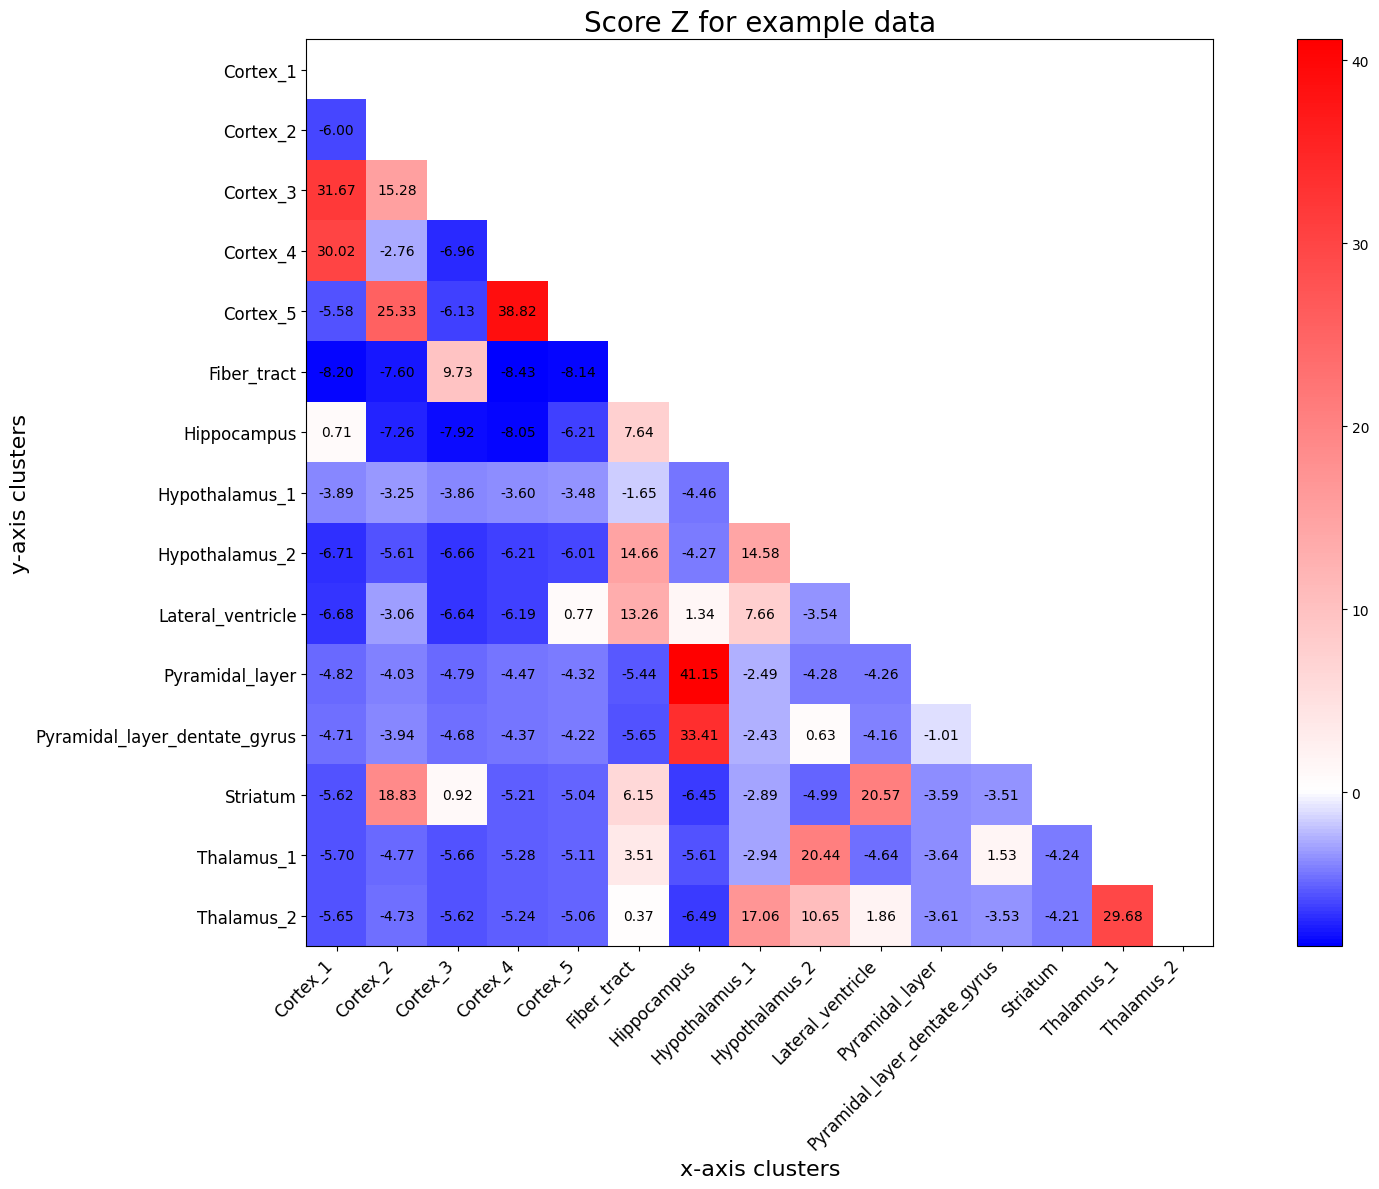

,Cortex_1,Cortex_2,Cortex_3,Cortex_4,Cortex_5,Fiber_tract,Hippocampus,Hypothalamus_1,Hypothalamus_2,Lateral_ventricle,Pyramidal_layer,Pyramidal_layer_dentate_gyrus,Striatum,Thalamus_1,Thalamus_2
Cortex_1,0.000000,-6.001364,31.667341,30.016554,-5.576356,-8.200633,0.706459,-3.886326,-6.705850,-6.679076,-4.820076,-4.708580,-5.619295,-5.697919,-5.650871
Cortex_2,-6.001364,0.000000,15.280089,-2.757309,25.329224,-7.597942,-7.257411,-3.253869,-5.607779,-3.057729,-4.034336,-3.941184,18.834638,-4.767300,-4.728038
Cortex_3,31.667341,15.280089,0.000000,-6.962526,-6.127932,9.725591,-7.924944,-3.862013,-6.663564,-6.636962,-4.789856,-4.679067,0.917617,-5.662108,-5.615361
Cortex_4,30.016554,-2.757309,-6.962526,0.000000,38.816777,-8.426579,-8.047658,-3.603518,-6.214347,-6.189577,-4.468630,-4.365351,-5.208752,-5.281543,-5.237986
Cortex_5,-5.576356,25.329224,-6.127932,38.816777,0.000000,-8.143092,-6.209056,-3.484070,-6.006999,0.767455,-4.320240,-4.220425,-5.035467,-5.105801,-5.063715
Fiber_tract,-8.200633,-7.597942,9.725591,-8.426579,-8.143092,0.000000,7.636525,-1.645142,14.656462,13.256713,-5.439155,-5.653609,6.145835,3.509804,0.369816
Hippocampus,0.706459,-7.257411,-7.924944,-8.047658,-6.209056,7.636525,0.000000,-4.457188,-4.269990,1.337737,41.147292,33.408617,-6.449247,-5.611606,-6.485585
Hypothalamus_1,-3.886326,-3.253869,-3.862013,-3.603518,-3.484070,-1.645142,-4.457188,0.000000,14.578076,7.656675,-2.485268,-2.428035,-2.894960,-2.935207,17.058302
Hypothalamus_2,-6.705850,-5.607779,-6.663564,-6.214347,-6.006999,14.656462,-4.269990,14.578076,0.000000,-3.538881,-4.278127,0.628905,-4.986294,20.436627,10.647590
Lateral_ventricle,-6.679076,-3.057729,-6.636962,-6.189577,0.767455,13.256713,1.337737,7.656675,-3.538881,0.000000,-4.261167,-4.162730,20.573484,-4.635962,1.859467


In [18]:
from spatools.plotting.pl import z_score_matrixplot

z_score_matrixplot(adata, show=True,
              title="Score Z for example data",
              return_object=True
              )

In [19]:
adata.uns["z-score"]["sample"]

,combination,count,proportion_observed,proportion_expected,std_dev,Z_score
0,"(Cortex_1, Cortex_2)",2.0,0.000543,0.010736,0.001698,-6.001364
1,"(Cortex_1, Cortex_3)",290.0,0.078762,0.015106,0.002010,31.667341
2,"(Cortex_1, Cortex_4)",256.0,0.069527,0.013158,0.001878,30.016554
3,"(Cortex_1, Cortex_5)",8.0,0.002173,0.012303,0.001817,-5.576356
4,"(Cortex_1, Fiber_tract)",8.0,0.002173,0.021994,0.002417,-8.200633
...,...,...,...,...,...,...
100,"(Pyramidal_layer_dentate_gyrus, Thalamus_1)",18.0,0.004889,0.003420,0.000962,1.526232
101,"(Pyramidal_layer_dentate_gyrus, Thalamus_2)",0.0,0.000000,0.003364,0.000954,-3.525571
102,"(Striatum, Thalamus_1)",0.0,0.000000,0.004859,0.001146,-4.240003
103,"(Striatum, Thalamus_2)",0.0,0.000000,0.004780,0.001137,-4.205129


In [23]:
adata.uns["check_spots"]

,spots_analysed,total_spots_anndata,percentage
Sample,2688,2688,100.0


# Multi-sample analysis

## 🧬 Overview
### In this analysis I've used a sample from my project in which there are good, bad and partial responders.
## ⚠️ Note:
### The following steps should be repeated for all three categories.

In [37]:
import os
import numpy as np
import scanpy as sc
import pandas as pd
import spatools as st 
import matplotlib as mpl
import matplotlib.pyplot as plt

adata = sc.read(os.path.join("..", "data", "scvi_non_5000_unique.h5ad"))
adata = st.tl.correlate_distances(adata, is_concatenated=True, cluster_col="clusters_0.6", batch_key="batch")

In [38]:
type(adata.obsm["spatial"])# spatial data must be like this

numpy.ndarray

In [39]:
adata.obsm["spatial"]# spatial data must be like this

array([[4126, 1601],
       [3144, 6006],
       [4051, 7137],
       ...,
       [5550, 5962],
       [5280, 4325],
       [5745, 4028]])

In [40]:
adata.uns["spatools"]# output of the previous function

,x,y,point_name,color,x_neigh,y_neigh,color_neigh,distance,batch,combination
0,4126,1601,4126_1601,6,4256,1601,6,130.000000,P1_GOR_S2,"(6, 6)"
1,4126,1601,4126_1601,6,4061,1488,0,130.361037,P1_GOR_S2,"(0, 6)"
2,4126,1601,4126_1601,6,4061,1714,6,130.361037,P1_GOR_S2,"(6, 6)"
3,4126,1601,4126_1601,6,4191,1488,0,130.361037,P1_GOR_S2,"(0, 6)"
4,4126,1601,4126_1601,6,4191,1714,0,130.361037,P1_GOR_S2,"(0, 6)"
...,...,...,...,...,...,...,...,...,...,...
130455,5280,4325,5280_4325,3,5188,4384,7,109.293184,P19_POR_S1,"(3, 7)"
130456,5280,4325,5280_4325,3,5182,4274,7,110.476242,P19_POR_S1,"(3, 7)"
130457,5280,4325,5280_4325,3,5379,4375,3,110.909873,P19_POR_S1,"(3, 3)"
130458,5745,4028,5745_4028,7,5652,4087,7,110.136279,P19_POR_S1,"(7, 7)"


In [41]:
adata.uns["spatools"]["response"] = adata.uns["spatools"]["batch"].str.split("_").str[1]# this step is not totaly necessary, depends on your biological question

adata = st.tl.z_score(adata, filter_column="response", filter_value="GOR")

/media/SATA/spatools/.venv/lib/python3.11/site-packages/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_matrix.fillna(0, inplace=True)
/media/SATA/spatools/.venv/lib/python3.11/site-packages/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  z_matrix.fillna(0, inplace=True)
/media/SATA/spatools/.venv/lib/python3.11/site-packages/spatools/tools/tl.py:560: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=

In [42]:
adata.uns_keys()

['check_distances',
 'check_spots',
 'clusters_0.6_colors',
 'hvg',
 'log1p',
 'neighbors',
 'pca',
 'pearson_residuals_normalization',
 'response_colors',
 'spatial',
 'spatools',
 't-test',
 'umap',
 'z-score',
 'zscore_matrix']

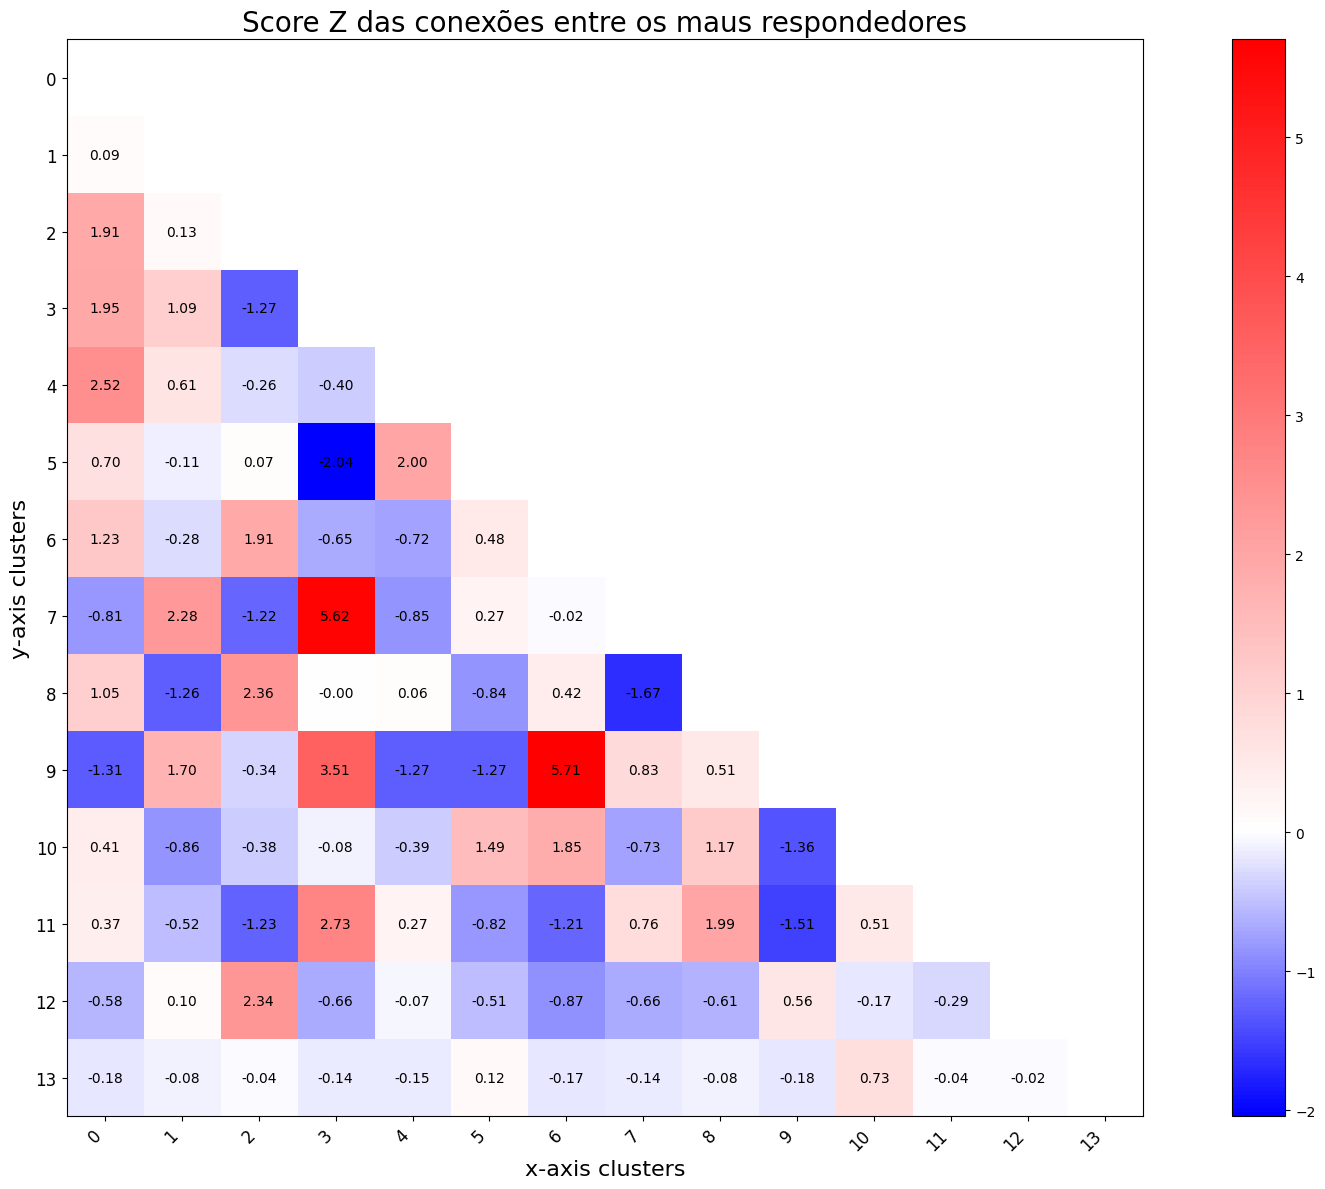

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.000000,0.086527,1.905369,1.953057,2.520662,0.701963,1.227249,-0.807746,1.047514,-1.311834,0.405358,0.374566,-0.579649,-0.178694
1,0.086527,0.000000,0.131444,1.091776,0.606701,-0.110440,-0.281139,2.282526,-1.259056,1.695406,-0.858276,-0.519138,0.100904,-0.077593
2,1.905369,0.131444,0.000000,-1.266200,-0.260859,0.065248,1.907279,-1.220382,2.362208,-0.338301,-0.380244,-1.227145,2.341512,-0.042345
3,1.953057,1.091776,-1.266200,0.000000,-0.404091,-2.040805,-0.654802,5.624701,-0.000769,3.506809,-0.084035,2.728587,-0.664489,-0.139578
4,2.520662,0.606701,-0.260859,-0.404091,0.000000,1.996779,-0.716166,-0.846789,0.062862,-1.266633,-0.387834,0.269061,-0.069365,-0.154000
5,0.701963,-0.110440,0.065248,-2.040805,1.996779,0.000000,0.483905,0.265446,-0.835951,-1.265925,1.494561,-0.818188,-0.508341,0.123296
6,1.227249,-0.281139,1.907279,-0.654802,-0.716166,0.483905,0.000000,-0.018581,0.424208,5.705998,1.852434,-1.210282,-0.869907,-0.166031
7,-0.807746,2.282526,-1.220382,5.624701,-0.846789,0.265446,-0.018581,0.000000,-1.668968,0.827165,-0.727302,0.757513,-0.658537,-0.143208
8,1.047514,-1.259056,2.362208,-0.000769,0.062862,-0.835951,0.424208,-1.668968,0.000000,0.511680,1.174947,1.985767,-0.613003,-0.084699
9,-1.311834,1.695406,-0.338301,3.506809,-1.266633,-1.265925,5.705998,0.827165,0.511680,0.000000,-1.356942,-1.510556,0.561591,-0.182252


In [43]:
st.pl.z_score_matrixplot(adata, show=True,
              title="Score Z das conexões entre os maus respondedores",
              )

In [44]:
samples = adata.uns["zscore_matrix"].keys()

for sample in samples:
    print(sample)

P1_GOR_S2
P2_GOR_S2
P3_GOR_S2
P4_GOR_S1
P5_GOR_S1
P6_GOR_S1
P7_GOR_S1
P8_GOR_S1
P9_GOR_S1


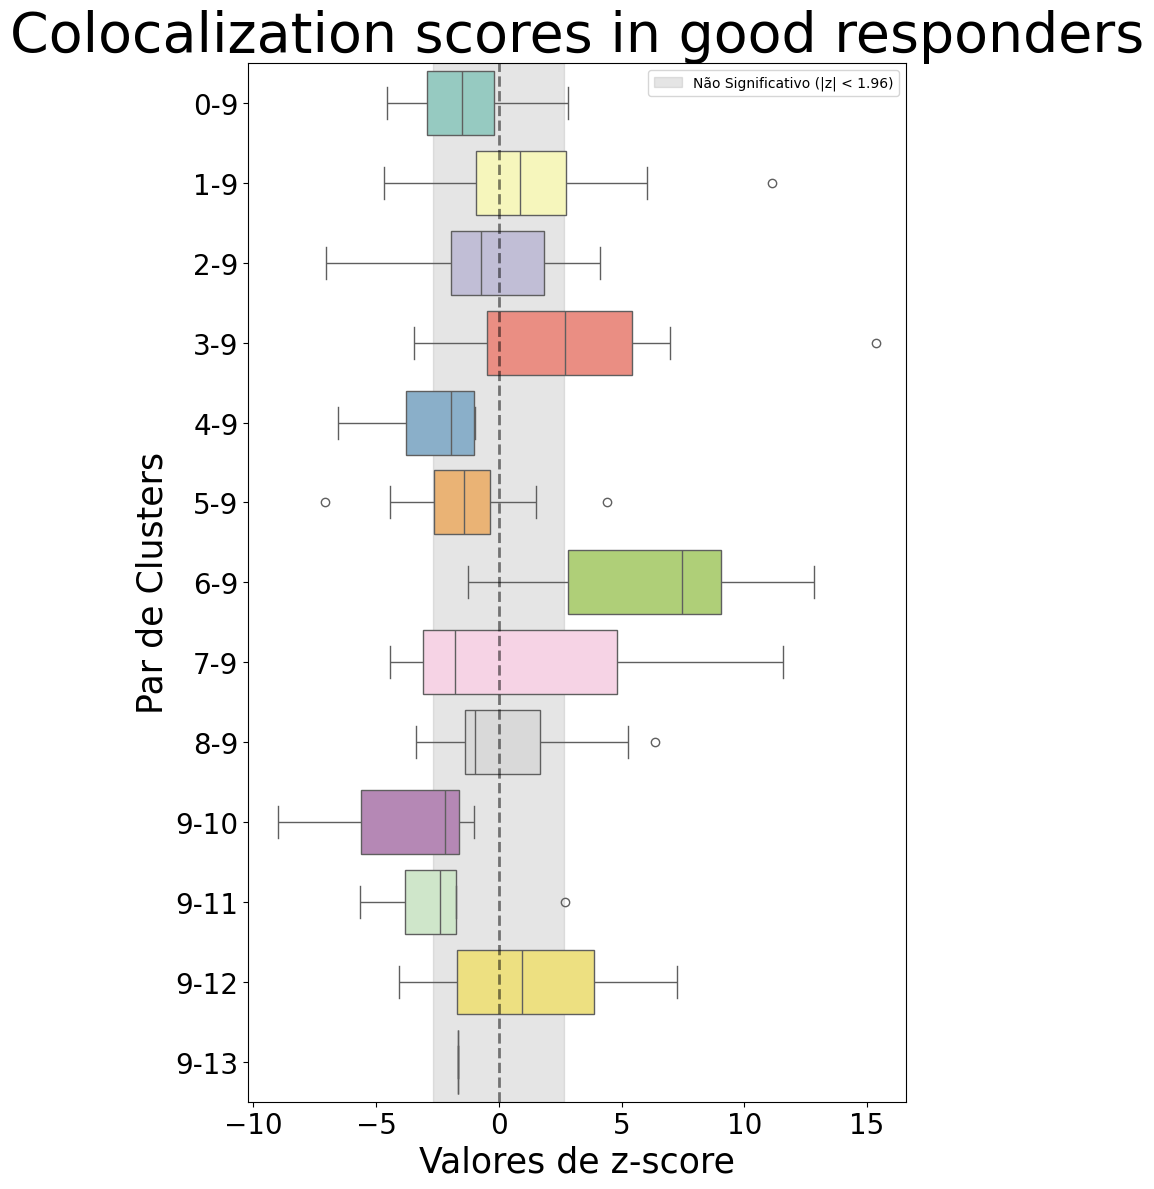

In [ ]:
st.pl.boxplot_cluster_correlations(adata, cluster_col="clusters_0.6", 
                             show=True, 
                             title="Colocalization scores in good responders",
                             subset=True,
                             value=9,
                             figsize=(8, 12),
                             title_font=40,
                             label_font= 25,
                             ticks_font=20
                             )

In [47]:
adata.uns["stats"]

,sample_key,Cluster Pair,Correlation,pval,FDR_pval,significant
0,P1_GOR_S2,0-9,-4.569900,4.879569e-06,1.768844e-05,True
1,P1_GOR_S2,1-9,2.757082,5.831966e-03,1.175082e-02,True
2,P1_GOR_S2,2-9,0.904834,3.655535e-01,4.015055e-01,False
3,P1_GOR_S2,3-9,5.417779,6.034406e-08,2.763123e-07,True
4,P1_GOR_S2,4-9,-1.036785,2.998361e-01,3.618879e-01,False
...,...,...,...,...,...,...
82,P9_GOR_S1,6-9,7.669219,1.730462e-14,1.881877e-13,True
83,P9_GOR_S1,7-9,-3.320521,8.984956e-04,2.299092e-03,True
84,P9_GOR_S1,8-9,0.094859,9.244265e-01,9.244265e-01,False
85,P9_GOR_S1,9-10,-1.028631,3.036531e-01,3.618879e-01,False
